In [103]:
# import modules

from typing import List, NamedTuple, Union, Dict
import pprint

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [104]:

raw_data: pd.DataFrame = pd.read_csv(
    filepath_or_buffer="../../dataset/00_raw/teleco_customer_churn.csv"
)

raw_data.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [105]:
# Checking the data type of all columns
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [106]:
cat_columns: List[str] = raw_data.select_dtypes(include="object").columns
num_columns: List[str] = raw_data.select_dtypes(include=["int64", "float64"]).columns

print(
    f"""
    raw_data has {len(raw_data)} rows and {len(raw_data.columns)} columns
    of which there are {len(cat_columns)} categorical columns
    and {len(num_columns)} numerical columns
    """
)


    raw_data has 7043 rows and 21 columns
    of which there are 18 categorical columns
    and 3 numerical columns
    


In [107]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From this simple first exploratory, the `teleco_churn` raw data have 21 columns: 18 of which are categorical, and three of which are numerical. 

There are no missing value detected across all these columns

Let's deep dive a little bit on the count of unique values for each of the categorical columns

In [108]:
for each_col in cat_columns: 
    print(f" Column {each_col} has {raw_data[each_col].nunique()} unique values")

 Column customerID has 7043 unique values
 Column gender has 2 unique values
 Column Partner has 2 unique values
 Column Dependents has 2 unique values
 Column PhoneService has 2 unique values
 Column MultipleLines has 3 unique values
 Column InternetService has 3 unique values
 Column OnlineSecurity has 3 unique values
 Column OnlineBackup has 3 unique values
 Column DeviceProtection has 3 unique values
 Column TechSupport has 3 unique values
 Column StreamingTV has 3 unique values
 Column StreamingMovies has 3 unique values
 Column Contract has 3 unique values
 Column PaperlessBilling has 2 unique values
 Column PaymentMethod has 4 unique values
 Column TotalCharges has 6531 unique values
 Column Churn has 2 unique values


Interesting, most categorical columns have between 2 - 4 columns, except for `TotalCharge` columns which have `6531` unique values. 

If we take a look from the dataframe above, we notice that `TotalCharge` actually contains numerical values that may have been "converted" into string. 

Hence, let's convert `TotalCharge` column back to numerical

In [109]:
raw_data["TotalCharges"] = pd.to_numeric(
    raw_data["TotalCharges"], 
    errors="coerce"
)

cat_columns: List[str] = raw_data.select_dtypes(include="object").columns
num_columns: List[str] = raw_data.select_dtypes(include=["int64", "float64"]).columns

print(f"cat_columns = {cat_columns}")
print(f"num_columns = {num_columns}")

cat_columns = Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
num_columns = Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [110]:
raw_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ok, so after we convert `TotalCharge` column to numerical, we have **11** `nulls`. So we have to replace these nulls with our own. 

We will impute these `null` values with statistics from training dataset to avoid leakage. 

Since we have not yet split our dataset into training, validation, and testing dataset; we will return again to this problem later once we have done the splitting. 

Now, let's try to see the distributions of each columns

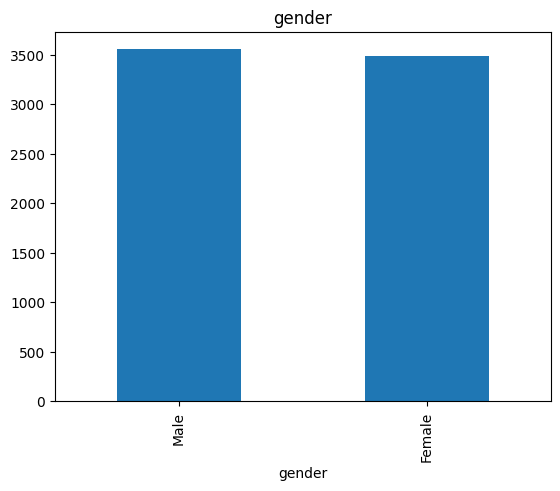

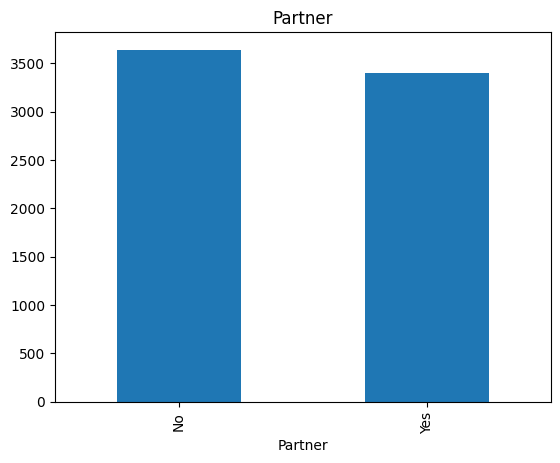

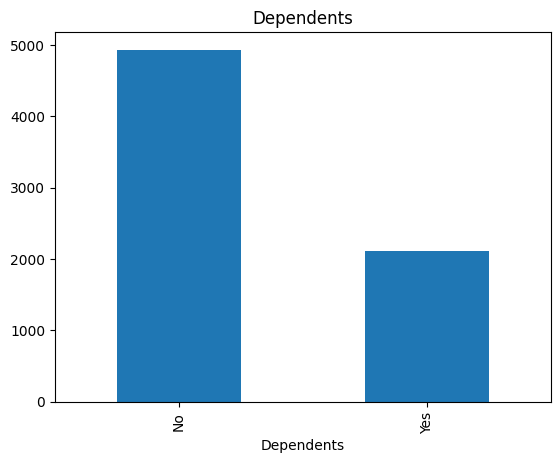

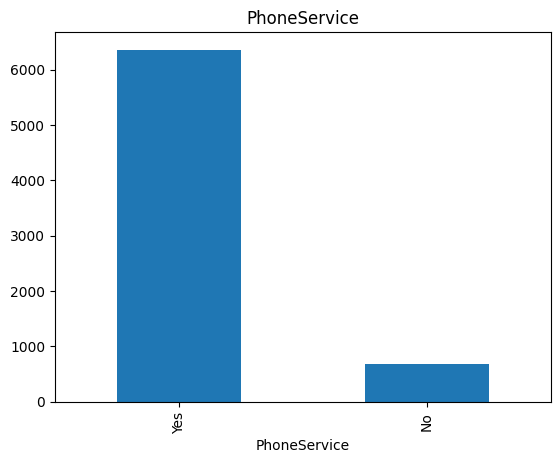

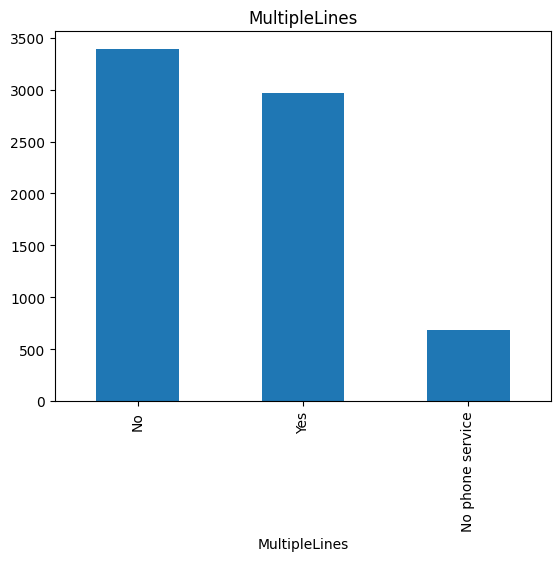

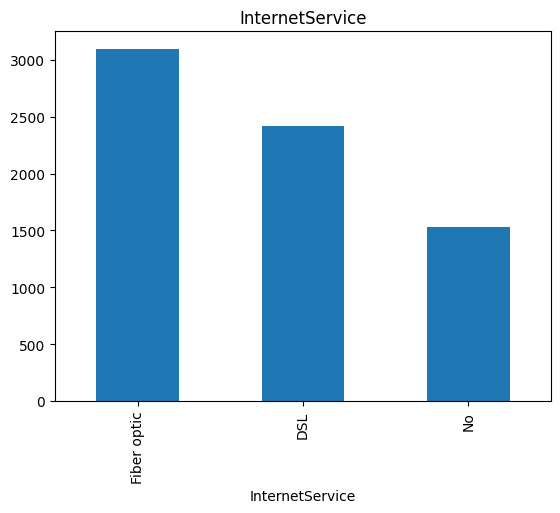

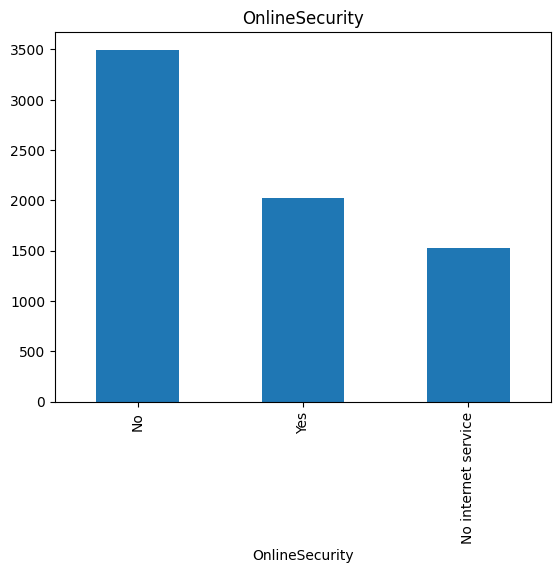

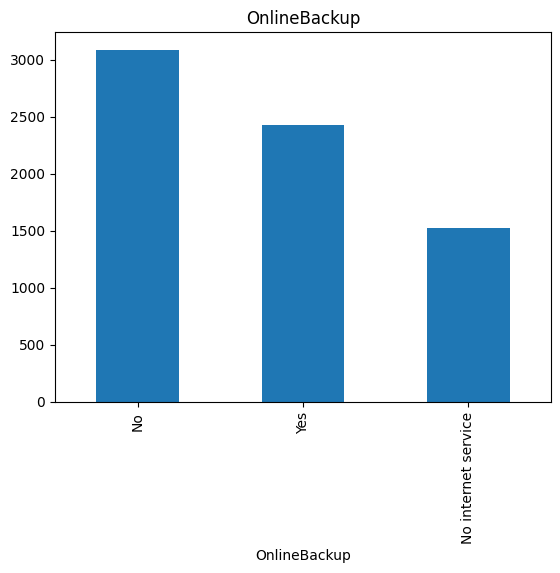

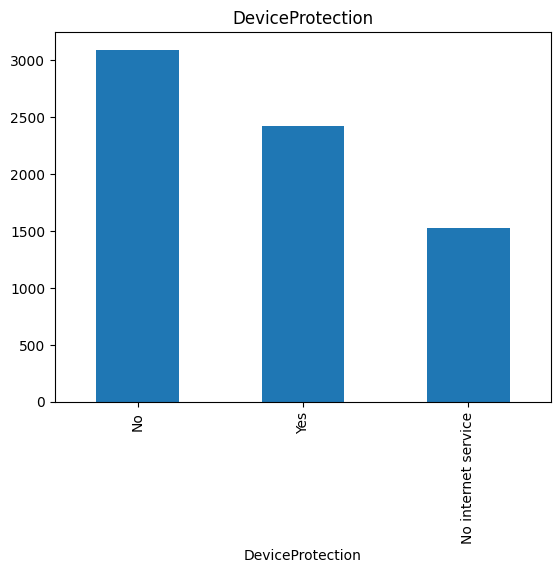

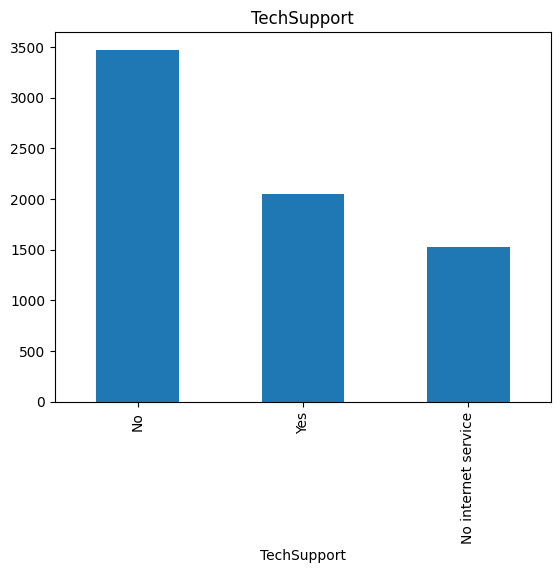

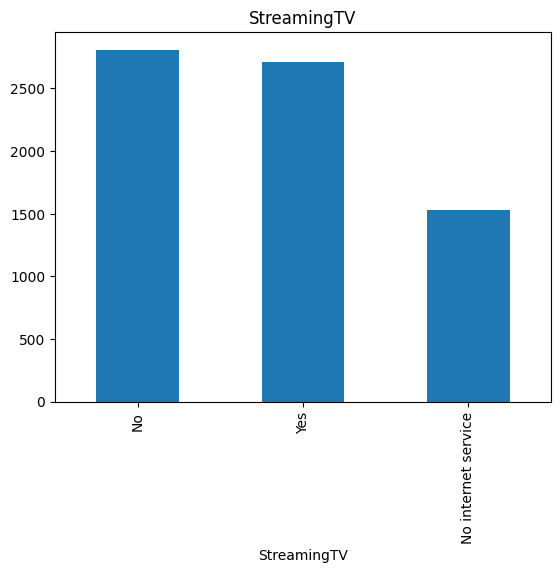

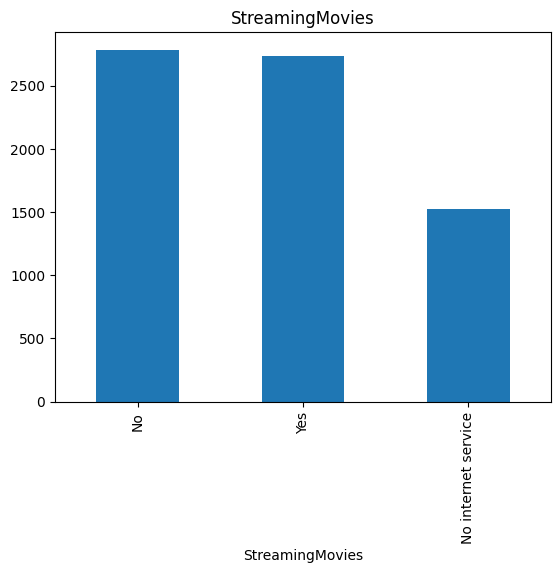

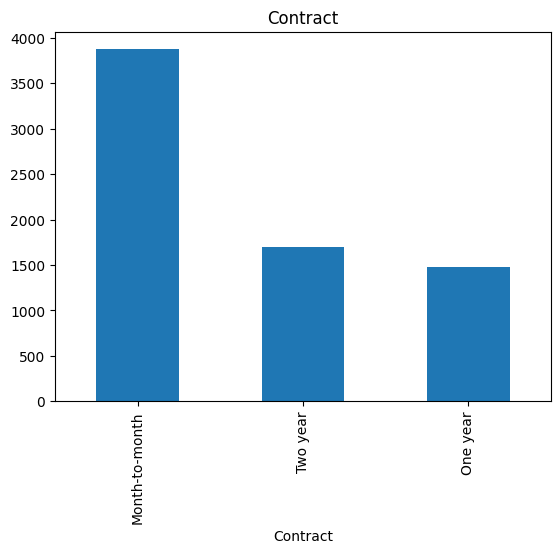

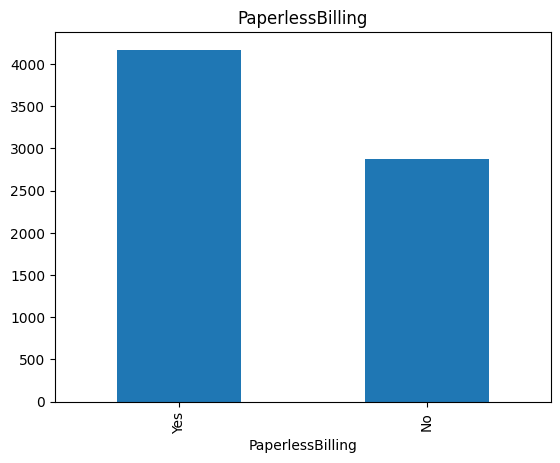

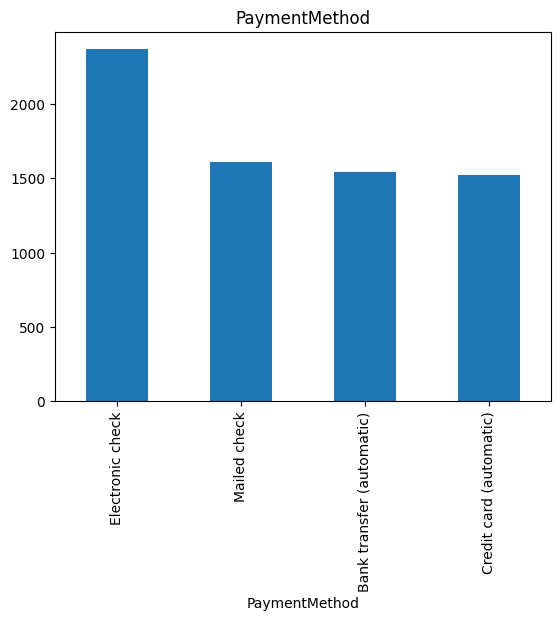

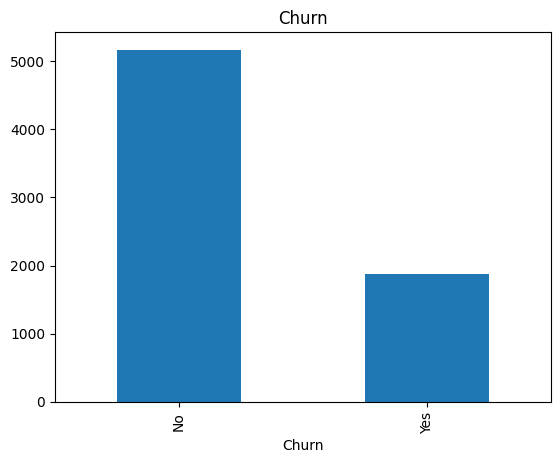

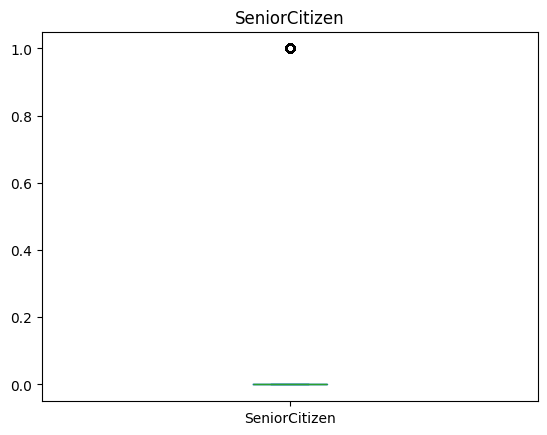

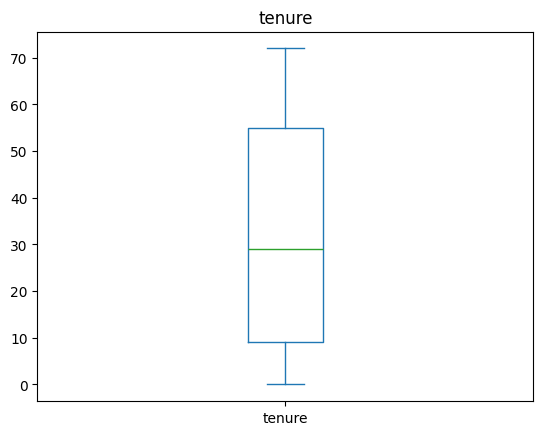

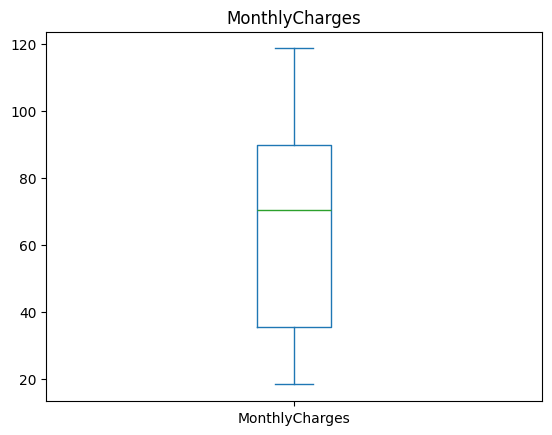

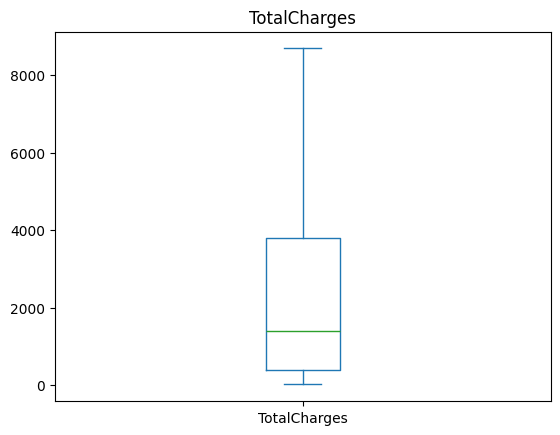

In [111]:
# create copy dataframe for exploration
_data_exploration: pd.DataFrame = raw_data.copy()

_data_exploration.drop(labels=["customerID"], axis=1, inplace=True)

cat_columns: List[str] = _data_exploration.select_dtypes(include=["object"]).columns
num_columns: List[str] = _data_exploration.select_dtypes(include=["int64", "float64"]).columns

# draw bar chart for each categorical columns
for each_col in cat_columns:
    _data_exploration[each_col].value_counts().plot(kind="bar")
    plt.title(each_col)
    plt.show()


# draw box plot for each numerical columns
for each_col in num_columns:
    _data_exploration[each_col].plot(kind="box")
    plt.title(each_col)
    plt.show()

From the plots above, we notice several interesting points: 

* The customers are predominated by people that do not have dependent by 5:2
* The customers are predominated by those having `PhoneService` by roughly 6:1
* Imbalance `Churned` customers by 5:2
* There is(are) outliers in `SeniorCitizen` columns
* The `TotalCharge` column is positively skewed having average of only 1000 currency-unit (CU), but Q3 of 4000 CU


Usually, the imbalance distribution of the categorical columns will have influence on the "bias" of the model later on. 

Furthermore, since we are asked to make a model to predict `Churned` customers given all the attributes known about a customer; and since the `Churned` column is unbalanced, we may need to augment the data, or oversampling the data for training later to compensate for this unbalanced distribution. The augmentation, however, DOES NOT remove bias already exists in the unbalanced distribution in the first place. 

Similarly, the skewed `TotalCharge` distribution will also usually means that the model will be biased toward either end of the tail. 

We will test for these potential pitfalls later when we evaluate bias.

Now, let's try to detect the outliers in the numerical columns. 

Even though that the outlier is indicated only for  `SeniorCitizen` column, it maybe a good idea to check outlier presence across all other numerical columns

Since the distribution of the numerical variables are not `normal`, we can't use `z-score` to detect outlier. 

Instead, we will be using `I`nter `Q`uartile `R`ange (IQR) method which is quite robust in the face of skewed distribution for detecting outlier.

In [112]:
# Define a function to detect outlier using IQR

class Outlier(NamedTuple):
    idx: int
    outlier_val: Union[float, int]


def detect_outliers_iqr(
        data_ds: pd.Series
) -> List[Outlier]:
    """
    This function is to detect outliers in a column of pandas dataframe
    
    :param data_ds: is the pd.Series taken from a single column from the dataframe
    :return: list of NamedTuple of (idx, outlier_val)
    """
    
    outliers: List[Outlier] = []
    
    q1: float = data_ds.quantile(0.25)
    q3: float = data_ds.quantile(0.75)
    iqr: float = q3 - q1
    
    lower_tail: float = q1 - (1.5*iqr)
    upper_tail: float = q3 + (1.5*iqr)
    
    for each_idx, each_val in data_ds.items():
        if (each_val < lower_tail) or (each_val > upper_tail):
            outliers.append(Outlier(idx=each_idx, outlier_val=each_val))
    
    return outliers

In [113]:
# Placeholder to hold outlier position and values in pandas column
outlier_dict: Dict[str, List[Outlier]] = {}

for each_col in num_columns:
    
    _col_to_check_outlier: pd.Series = _data_exploration[each_col].copy()
    
    _list_outlier: List[Outlier] = detect_outliers_iqr(data_ds=_col_to_check_outlier)
    
    outlier_dict[each_col] = _list_outlier

pprint.pprint(outlier_dict)

{'MonthlyCharges': [],
 'SeniorCitizen': [Outlier(idx=20, outlier_val=1),
                   Outlier(idx=30, outlier_val=1),
                   Outlier(idx=31, outlier_val=1),
                   Outlier(idx=34, outlier_val=1),
                   Outlier(idx=50, outlier_val=1),
                   Outlier(idx=52, outlier_val=1),
                   Outlier(idx=53, outlier_val=1),
                   Outlier(idx=54, outlier_val=1),
                   Outlier(idx=55, outlier_val=1),
                   Outlier(idx=57, outlier_val=1),
                   Outlier(idx=72, outlier_val=1),
                   Outlier(idx=75, outlier_val=1),
                   Outlier(idx=78, outlier_val=1),
                   Outlier(idx=91, outlier_val=1),
                   Outlier(idx=99, outlier_val=1),
                   Outlier(idx=103, outlier_val=1),
                   Outlier(idx=113, outlier_val=1),
                   Outlier(idx=126, outlier_val=1),
                   Outlier(idx=129, outlier_val=1),
    

Interesting, so the "outliers" in `SeniorCitizen` column are all `1`. 

Meanwhile, there are no outliers detected in `MonthlyCharge`, `TotalCharges` and `tenure` columns.

It seems that the "number" in `SeniorCitizen` column is just labels for "True", or "False". 

So, let's convert `SeniorCitizen` column to categorical

In [114]:
_data_exploration["SeniorCitizen"] = _data_exploration["SeniorCitizen"].astype("object")

_data_exploration.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now, let's try to draw a barchart for `SeniorCitizen` column, so that we can have a feel about its distribution

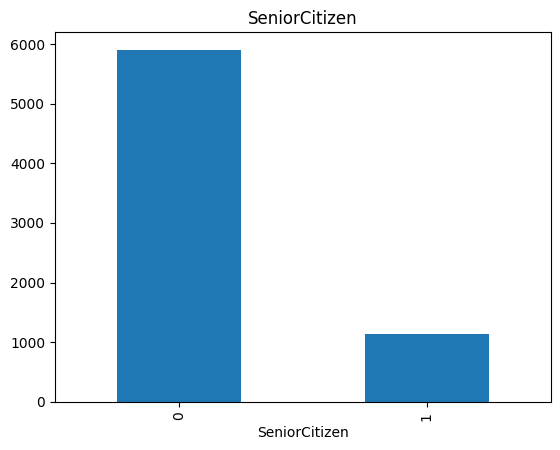

In [115]:
_data_exploration["SeniorCitizen"].value_counts().plot(kind="bar")
plt.title("SeniorCitizen")
plt.show()

Ok, so we have another imbalance distribution for `SeniorCitizen` column

We will need to check how the model will have bias to these subgroups later

Finally, let's augment the `raw_data` so that our target `Churned` column have more balanced proportion

Let's create a function to help us to do so

In [119]:
# Define a functon to augment data

def augment_raw_data(
        raw_data: pd.DataFrame,
        column_name: str
) -> pd.DataFrame:
    """
    Augment `raw_dat` dataframe using `column_name` distribution. 
    
    The output of this function is to make the distribution of `column_name` to have about equal proportion for each categories
    
    The function assumes that `column_name` column is categorical
    
    :param raw_data: 
    :param column_name: 
    :return: augmented dataframe 
    """
    
    target_column: pd.Series = raw_data[column_name].copy()
    
    # get the proportion of each category
    category_counts: pd.Series = target_column.value_counts()
    print(f"category_counts: {category_counts}")
    
    # get the number of categories
    num_categories: int = len(category_counts)
    
    # calculate proportion for each category, to make sure equal distribution
    target_proportion: float = 1/num_categories
    
    # calculate the number of samples to add for each categories
    samples_to_add: Dict[str, int] = {}
    for categ, count in category_counts.items():
        samples_to_add[categ] = int((target_proportion * raw_data.shape[0]) - count)
    
    # identify the majority and minority classes
    minority_class: str = max(samples_to_add, key=lambda x: samples_to_add[x]) 
    majority_class: str = min(samples_to_add, key=lambda x: samples_to_add[x])
    
    # count num rows to add per instance found
    num_rows_to_add: int = int(category_counts[minority_class]/samples_to_add[minority_class])
    
    # augment the data
    augmented_data: List = []
    for each_idx, each_row in raw_data.iterrows():
        if each_row[column_name] == minority_class:
            augmented_data.append(each_row.to_list())
            for _ in range(num_rows_to_add):
                augmented_data.append(each_row.to_list())
        else:
            augmented_data.append(each_row.to_list())
    
    # create new dataframe from the augmented data
    augmented_df: pd.DataFrame = pd.DataFrame(augmented_data, columns=raw_data.columns)
    
    return augmented_df

Ok, let's try our newly minted function

In [120]:
_augmented_exploratory: pd.DataFrame = augment_raw_data(raw_data=_data_exploration, column_name="Churn")

print(
    f"""
    _data_exploration has {len(_data_exploration)} rows and {len(_data_exploration.columns)} columns
    _augmented_exploratory has {len(_augmented_exploratory)} rows and {len(_augmented_exploratory.columns)} columns
    """
)

category_counts: Churn
No     5174
Yes    1869
Name: count, dtype: int64

    _data_exploration has 7043 rows and 20 columns
    _augmented_exploratory has 8912 rows and 20 columns
    


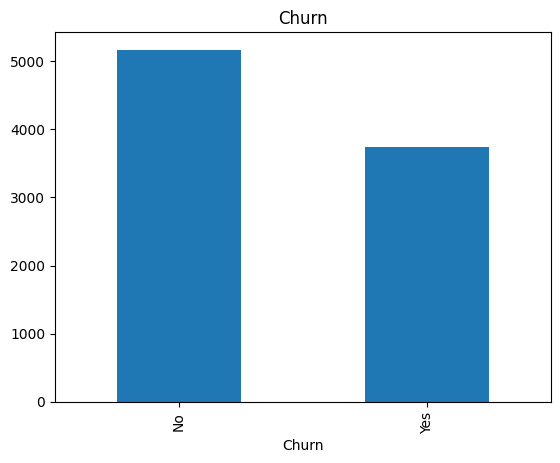

In [121]:
_augmented_exploratory["Churn"].value_counts().plot(kind="bar")
plt.title("Churn")
plt.show()

That's better.

So, to recap, from this exploratory phase, we have to do the following to clean-up and transfrom the data, and make the target columns more balanced

1. Convert `TotalCharges` column to numerical --> this will gives `null` which need to be handled later
2. Convert `SeniorCitizen` column to categorical
3. Augment data to make `Churn` target column more balanced

We will wrap these steps into a function, so that we can use the same treatment later

In [ ]:
# define a function to treat clean-up and transform data